In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import Conv2D,Flatten
from keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.utils import to_categorical

/home/bartek/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
csv_url='mrec20190331sh.csv'

In [3]:
MM= pandas.read_csv(csv_url)
#Mdataset=shuffle(MM)
Mdataset=MM
#Mdataset=MM.sample(frac=1)
Mdataset.head(24)

,time,date,training,step,up,slice,C_1,C_2,C_3,C_4,...,C_119,C_120,C_121,C_122,C_123,C_124,C_125,C_126,C_127,C_128
0,1554034538313,13:15:38.313,0,3,1,20749,-1582,-1246,-1154,-1048,...,-717,-1292,-1870,-2740,-3943,-7717,-5649,-5049,-4373,-1388
1,1554034538958,13:15:38.958,0,4,1,11691,1129,-1069,-2942,-1149,...,-409,348,861,1213,1512,1752,1900,1880,1684,1290
2,1554034539517,13:15:39.517,0,5,1,16388,-1193,-1334,-1335,-1177,...,-799,-894,-427,-241,-1055,-2808,-4800,-6162,-5930,-4257
3,1554034540279,13:15:40.279,0,7,1,7260,-6039,-6794,-6913,-6052,...,-1711,-838,-118,685,1274,1708,1932,2029,1896,1514
4,1554034540774,13:15:40.774,0,8,1,10254,-849,-649,-609,599,...,-6910,-6480,-5717,-4929,-3993,-2927,-1634,58,2075,4084
5,1554034541375,13:15:41.375,0,9,1,12306,-1080,-1194,-899,-1592,...,-8906,-9413,-10840,-7151,-4897,-2475,117,2617,4687,6185
6,1554034542523,13:15:42.523,0,11,1,12275,-2486,-2163,-1768,-1012,...,-11805,-4060,842,4266,6569,7701,7724,7551,8352,9295
7,1554034542921,13:15:42.921,0,12,1,11018,8583,10208,10235,8198,...,713,100,-892,-1964,-2723,-3133,-3247,-3126,-3739,-2875
8,1554034543324,13:15:43.324,0,13,1,48631,2680,528,-1944,-2139,...,-9816,-6239,-1868,2799,7462,11651,14786,16388,15598,12734
9,1554034543872,13:15:43.872,0,14,1,12990,407,351,34,517,...,-3411,-2257,-417,1618,3236,4327,4832,4874,4584,4119


In [4]:
Xdataset=Mdataset.iloc[:,6:]
Xdataset.head(4)

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_119,C_120,C_121,C_122,C_123,C_124,C_125,C_126,C_127,C_128
0,-1582,-1246,-1154,-1048,-649,1994,6018,5731,-7140,-20749,...,-717,-1292,-1870,-2740,-3943,-7717,-5649,-5049,-4373,-1388
1,1129,-1069,-2942,-1149,2555,2879,-2674,-2883,6474,11691,...,-409,348,861,1213,1512,1752,1900,1880,1684,1290
2,-1193,-1334,-1335,-1177,-935,-403,2626,2800,-3529,-16388,...,-799,-894,-427,-241,-1055,-2808,-4800,-6162,-5930,-4257
3,-6039,-6794,-6913,-6052,-4488,-2027,872,3718,5988,7260,...,-1711,-838,-118,685,1274,1708,1932,2029,1896,1514


In [5]:
Ydataset = Mdataset['up']
Ydataset.head(14)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
Name: up, dtype: int64

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Xdataset)
dataset[0]

array([0.69709285, 0.64927928, 0.62138997, 0.60273157, 0.63374757,
       0.71177725, 0.75594206, 0.60099851, 0.21109774, 0.11827972,
       0.28522453, 0.35524075, 0.32991574, 0.28689632, 0.22561936,
       0.29818285, 0.40387947, 0.53001798, 0.59778503, 0.63013014,
       0.71805336, 0.70759821, 0.68510394, 0.73445244, 0.63222592,
       0.55739978, 0.53556898, 0.46844399, 0.42088786, 0.39485074,
       0.44157377, 0.46432761, 0.42256175, 0.43869021, 0.55219045,
       0.6344656 , 0.64188281, 0.6323048 , 0.51172305, 0.56682931,
       0.67630578, 0.65807281, 0.63915501, 0.56704048, 0.5946666 ,
       0.50059364, 0.45418256, 0.39414842, 0.33752414, 0.37737464,
       0.44753476, 0.50771955, 0.57587205, 0.63183933, 0.77228327,
       0.80289066, 0.78136177, 0.72250197, 0.62570264, 0.57068222,
       0.41274178, 0.45299901, 0.57659536, 0.62340705, 0.60511465,
       0.45968213, 0.3688314 , 0.43737634, 0.57806121, 0.66798858,
       0.62338786, 0.55152418, 0.61694996, 0.57613075, 0.51401

In [7]:
#dataset=dataset.reshape((dataset.shape[0],1,-1))
dataset=dataset.reshape(dataset.shape+(1,))
print(dataset.shape)
dataset[0,0]

(329, 128, 1)


array([0.69709285])

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
trainX, testX = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(trainX), len(testX))

220 109


In [9]:
# reshape into X=t and Y=t+1
look_width = 48
look_height=32
from sklearn import preprocessing 
from sklearn import utils
from io import StringIO

#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)
le = preprocessing.LabelEncoder()
YN=utils.column_or_1d(Ydataset, warn=True)



In [10]:
YO=le.fit_transform(YN)
YO
len(le.classes_)
Yclasses=len(le.classes_)
print(Yclasses)

2


In [11]:
trainY = YO[0:train_size]
testY=YO[train_size:len(YO)]
print('data:',len(trainY), len(testY))


data: 220 109


In [12]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [13]:
trainX.shape

(220, 128, 1)

In [14]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0],  trainX.shape[2],2))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
print(trainX.shape)
#dataset.shape
print(trainY.shape)
#print('trainyo',trainYO.shape)


(220, 128, 1)
(220,)


In [58]:
seq_length = trainX.shape[1]
print(seq_length)

model = Sequential()
model.add(Conv1D(32, 1, activation='relu', input_shape=(seq_length,1)))
model.add(Conv1D(64, 1, activation='relu'))
#model.add(MaxPooling1D(1))
model.add(Dense(128))
model.add(Flatten())
#model.add(Conv1D(128,1 ))
#model.add(MaxPooling1D())
#model.add(Conv1D(128, 1, activation='relu'))
#model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(Yclasses, activation='softmax'))
model.summary()

128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_51 (Conv1D)           (None, 128, 32)           64        
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 128, 64)           2112      
_________________________________________________________________
dense_34 (Dense)             (None, 128, 128)          8320      
_________________________________________________________________
flatten_10 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16384)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 32770     
Total params: 43,266
Trainable params: 43,266
Non-trainable params: 0
_________________________________________________________________


In [59]:
trainYO = to_categorical(trainY, num_classes=Yclasses)
testYO = to_categorical(testY, num_classes=Yclasses)

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.fit(trainX, trainYO, epochs=70)


Epoch 1/70
220/220 [==============================] - 0s 2ms/step - loss: 1.4415 - acc: 0.5409
Epoch 2/70
220/220 [==============================] - 0s 369us/step - loss: 0.7731 - acc: 0.5318
Epoch 3/70
220/220 [==============================] - 0s 381us/step - loss: 0.6272 - acc: 0.6909
Epoch 4/70
220/220 [==============================] - 0s 363us/step - loss: 0.5356 - acc: 0.7455
Epoch 5/70
220/220 [==============================] - 0s 367us/step - loss: 0.5037 - acc: 0.7591
Epoch 6/70
220/220 [==============================] - 0s 368us/step - loss: 0.4521 - acc: 0.7909
Epoch 7/70
220/220 [==============================] - 0s 376us/step - loss: 0.4726 - acc: 0.7727
Epoch 8/70
220/220 [==============================] - 0s 369us/step - loss: 0.4256 - acc: 0.8136
Epoch 9/70
220/220 [==============================] - 0s 369us/step - loss: 0.4398 - acc: 0.7818
Epoch 10/70
220/220 [==============================] - 0s 368us/step - loss: 0.4060 - acc: 0.8227
Epoch 11/70
220/220 [==========

In [36]:
score = model.evaluate(testX, testYO)
print(score)

109/109 [==============================] - 0s 619us/step
[1.0692903098710087, 0.7247706425436046]


In [37]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

220/220 [==============================] - 0s 231us/step
Test loss: 0.2967672846534035
Test accuracy: 0.8454545476219871


In [38]:
# Keras reported accuracy:
score = model.evaluate(testX,testYO, verbose=0) 
print(score[1])
# 0.98580000000000001

# Actual accuracy calculated manually:
predY= model.predict(trainX)
acc = sum([numpy.argmax(trainYO[i])==numpy.argmax(predY[i]) for i in range(len(trainYO))])/len(trainYO)
print(acc)
# 0.98580000000000001

print(score[1]==acc)
# True    

0.7247706425436046
0.8454545454545455
False


In [39]:
# make predictions
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
#trainPredict1

In [40]:
#softmax(trainPredict)
trainPredict=numpy.argmax(trainPredict1,1)
testPredict=numpy.argmax(testPredict1,1)
diffY=trainPredict-trainY

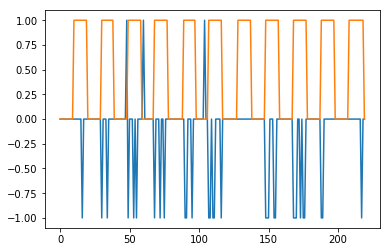

In [60]:
plt.plot(diffY)
plt.plot(trainY)
plt.show()

In [71]:

# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [72]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 5.460 RMSE
Test Score: 5.301 RMSE


In [62]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot.reshape(,,-1)
trainPredictPlot[:, :] = numpy.nan
print(trainPredictPlot.shape)
trainPredictPlot[0:len(trainPredict),0] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(dataset)-len(testPredict):len(dataset), 0] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-62-0860eeb65c4e>, line 3)

In [74]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=2;
trainPredictPlot[wws:len(trainPredict)+wws,0] = trainPredict
wws=60
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-look_back-1, 0] = testPredict
# plot baseline and predictions

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(trainY,label="set")
ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="testm")
#plt.figure(figsize=(15,3))

plt.legend()
plt.show()

ValueError: could not broadcast input array from shape (387) into shape (387,1)